In [185]:
!pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 4.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 15.4 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pdpbox 0.2.1 requires sklearn, which is not installed.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.5.2 which is incompatible.


In [224]:
import pandas as pd
import io
import seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from scipy.stats import chi2
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import RocCurveDisplay, roc_curve, accuracy_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss, TomekLinks
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB
import warnings
warnings.filterwarnings("ignore")

### Data Cleaning

In [5]:
df = pd.read_excel("/Users/artoriasyang/Desktop/Study/UofT biostats/CHL5230/C-CHANGE Analysis Data v52c.xlsx")

In [6]:
df.head()

,Patient_ID,Sex,Age,BirthYear,BMI,Obese,Height,Weight,WaistCircumference,sBP,...,CAD_Hx,Stroke_Hx,Smoking_Status,DM_Hx,Hypertension_Hx,Urin_Alb_Creat_Ratio,TC_HDL_Ratio,CVD Risk,CVD_Death,High CVD Risk
0,1001000000000013,F,39,1976,NaN,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0
1,1001000000000054,M,66,1949,29.0,0,185.5,99.9,105.0,146.0,...,NaN,NaN,NaN,NaN,1.0,NaN,3.341,22.670272,3.760807,1
2,1001000000000081,F,30,1985,NaN,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0
3,1001000000000082,F,62,1953,NaN,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0
4,1001000000000090,F,24,1991,26.4,0,181.0,86.6,97.5,127.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


For the first table, we want to keep BMI, Obese, sBP, dBP, Smoking_Status, FBS, HDL, LDL, MI_Hx, CAD_Hx, Stroke_Hx, DM_Hx, Hypertension_Hx, Statin_usage, Thiazide_usage, Antihypertensive_usage, AlphaBlocker_usage, BetaBlocker_usage 

In [13]:
df.columns

Index(['Patient_ID', 'Sex', 'Age', 'BirthYear', 'BMI', 'Obese', 'Height',
       'Weight', 'WaistCircumference', 'sBP', 'dBP', 'FBS', 'HDL', 'LDL',
       'LDL_CVD Risk', 'LDL-CVDRisk-Statin', 'TC_Age_Sex', 'TC', 'TG', 'INR',
       'DM_HbA1c', 'DM_A1c<6.6', 'HBA1C', 'Any_AntiHTN', 'Any_AntiHTN-HTN',
       'ACE+ARB', 'ACE-or-ARB', 'MI+BB+ACE-or-ARB', 'MI+BB', 'HTN+CAD',
       'HTN+CAD+ACE-or-ARB', 'Diuretic_usage', 'Antihypertensive_usage',
       'Statin_usage', 'DM_Statin', 'DM_ACE/ARB', 'CCB_usage',
       'Thiazide_usage', 'ACEI_usage', 'ARB_usage', 'AlphaBlocker_usage',
       'DihydropyridineCCB_usage', 'Warfarin_usage', 'Antiplatelet_usage',
       'DipyridamoleER_usage', 'Clopidogrel_usage', 'BetaBlocker_usage',
       'Antihyper_Peripher_usage', 'Antihyperglycemics_usage', 'ASA_usage',
       'HeartFailure_Hx', 'AtrialFibrillation_Hx', 'TIA_Hx', 'Dyslipidemia_Hx',
       'BP>160_Macrovasc', 'MacroVasc', 'DM_Macrovasc', 'DM-sBP<130',
       'DM-dBP<80', 'MI_Hx', 'CAD_Hx', 'St

In [16]:
df_selected = df[['BMI', 'Obese', 'sBP', 'dBP', 'Smoking_Status', 'FBS', 'HDL', 'LDL', 'MI_Hx', 'CAD_Hx', 'Stroke_Hx', 'DM_Hx', 'Hypertension_Hx', 'Statin_usage', 'Thiazide_usage', 'Antihypertensive_usage', 'AlphaBlocker_usage', 'BetaBlocker_usage']]

In [17]:
df_selected.head()

,BMI,Obese,sBP,dBP,Smoking_Status,FBS,HDL,LDL,MI_Hx,CAD_Hx,Stroke_Hx,DM_Hx,Hypertension_Hx,Statin_usage,Thiazide_usage,Antihypertensive_usage,AlphaBlocker_usage,BetaBlocker_usage
0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29.0,0,146.0,89.0,NaN,NaN,0.91,1.63,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
2,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,26.4,0,127.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_half = pd.read_excel("/Users/artoriasyang/Desktop/Study/UofT biostats/CHL5230/C-CHANGE Analysis Data v52c.xlsx", sheet_name='Framingham')

For the second table, we want to keep age, male, family_hx and diabetes

In [20]:
df_half_selected = df_half[['age', 'male', 'family_hx', 'diabetes']]

In [21]:
df_half_selected.head()

,age,male,family_hx,diabetes
0,39,0,0,0
1,66,1,0,0
2,30,0,0,0
3,62,0,0,0
4,24,0,0,0


In [14]:
df_half.columns

Index(['timeperiod', 'age', 'male', 'cigarettes', 'smoker', 'family_hx',
       'diabetes', 'lvh', 'systolic_bp', 'total_chol', 'hdl_chol', 'CHD', 'MI',
       'STROKE', 'CVD', 'CHD_DEATH', 'CVD_DEATH', 'BNF', 'BP', 'TC', 'HDL',
       'All', 'Any', 'M>39,F>49', 'Agecriteria_All'],
      dtype='object')

In [12]:
df_half.head()

,timeperiod,age,male,cigarettes,smoker,family_hx,diabetes,lvh,systolic_bp,total_chol,...,CHD_DEATH,CVD_DEATH,BNF,BP,TC,HDL,All,Any,"M>39,F>49",Agecriteria_All
0,10,39,0,0,0,0,0,0,0.0,0.00,...,NaN,NaN,NaN,0,0,0,0,0,0,0
1,10,66,1,0,0,0,0,0,146.0,3.04,...,3.760807,5.9715,18.278335,1,1,1,1,1,1,1
2,10,30,0,0,0,0,0,0,0.0,0.00,...,NaN,NaN,NaN,0,0,0,0,0,0,0
3,10,62,0,0,0,0,0,0,0.0,0.00,...,NaN,NaN,NaN,0,0,0,0,0,1,0
4,10,24,0,0,0,0,0,0,127.0,0.00,...,NaN,NaN,NaN,1,0,0,0,1,0,0


In [10]:
df.shape

(976147, 70)

In [11]:
df_half.shape

(976147, 25)

In [56]:
df_uncleaned = pd.concat([df_selected, df_half_selected], axis=1, join='inner')

In [57]:
df_uncleaned.head()

,BMI,Obese,sBP,dBP,Smoking_Status,FBS,HDL,LDL,MI_Hx,CAD_Hx,...,Hypertension_Hx,Statin_usage,Thiazide_usage,Antihypertensive_usage,AlphaBlocker_usage,BetaBlocker_usage,age,male,family_hx,diabetes
0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,39,0,0,0
1,29.0,0,146.0,89.0,NaN,NaN,0.91,1.63,1.0,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,66,1,0,0
2,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,30,0,0,0
3,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,62,0,0,0
4,26.4,0,127.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,24,0,0,0


In [58]:
df_uncleaned.shape

(976147, 22)

In [59]:
# Check for missing values in the dataset,
print(df_uncleaned.isna().sum())

BMI                       695019
Obese                          0
sBP                       481057
dBP                       481704
Smoking_Status            974356
FBS                       751140
HDL                       697516
LDL                       700850
MI_Hx                     967935
CAD_Hx                    971439
Stroke_Hx                 975568
DM_Hx                     901554
Hypertension_Hx           823545
Statin_usage              937217
Thiazide_usage            950562
Antihypertensive_usage    974320
AlphaBlocker_usage        974701
BetaBlocker_usage         957362
age                            0
male                           0
family_hx                      0
diabetes                       0
dtype: int64


### Fill in with missing values

In [80]:
# get all the columns that needed to be filled in with median value
selected_col = ['BMI', 'sBP', 'dBP', 'FBS', 'HDL', 'LDL']
df_uncleaned.update(df_uncleaned[selected_col].fillna(df_uncleaned[selected_col].median()))

# get all the columns that needed to be filled in with 0 value
selected_col2 = ['Smoking_Status', 'MI_Hx', 'CAD_Hx', 'Stroke_Hx', 'DM_Hx', 'Hypertension_Hx', 'Statin_usage', 
                 'Thiazide_usage', 'Antihypertensive_usage', 'AlphaBlocker_usage', 'BetaBlocker_usage']
df_uncleaned.update(df_uncleaned[selected_col2].fillna(0))

In [81]:
df_uncleaned

,BMI,Obese,sBP,dBP,Smoking_Status,FBS,HDL,LDL,MI_Hx,CAD_Hx,...,Hypertension_Hx,Statin_usage,Thiazide_usage,Antihypertensive_usage,AlphaBlocker_usage,BetaBlocker_usage,age,male,family_hx,diabetes
0,27.2,0,122.0,76.0,0.0,5.2,1.34,2.74,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,39,0,0,0
1,29.0,0,146.0,89.0,0.0,5.2,0.91,1.63,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,66,1,0,0
2,27.2,0,122.0,76.0,0.0,5.2,1.34,2.74,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,30,0,0,0
3,27.2,0,122.0,76.0,0.0,5.2,1.34,2.74,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,62,0,0,0
4,26.4,0,127.0,78.0,0.0,5.2,1.34,2.74,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,24,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976142,54.5,1,152.0,87.0,0.0,5.2,1.34,2.74,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,45,1,0,0
976143,27.9,0,120.0,66.0,0.0,5.2,1.34,2.74,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,38,0,0,0
976144,27.2,0,122.0,76.0,0.0,5.2,1.34,2.74,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,64,1,0,0
976145,26.0,0,150.0,74.0,0.0,5.2,1.34,2.74,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,48,1,0,0


In [48]:
df_uncleaned[selected_col].median()

BMI     27.20
sBP    122.00
dBP     76.00
FBS      5.20
HDL      1.34
LDL      2.74
dtype: float64

In [42]:
df_uncleaned.describe()

,BMI,Obese,sBP,dBP,Smoking_Status,FBS,HDL,LDL,MI_Hx,CAD_Hx,...,Hypertension_Hx,Statin_usage,Thiazide_usage,Antihypertensive_usage,AlphaBlocker_usage,BetaBlocker_usage,age,male,family_hx,diabetes
count,976147.000000,976147.000000,495090.000000,494443.000000,1791.000000,225007.000000,278631.000000,275297.000000,8212.0,4708.0,...,152602.0,38930.0,25585.0,1827.0,1446.0,18785.0,976147.000000,976147.000000,976147.0,976147.000000
mean,27.568532,0.093564,123.789031,75.718699,0.998325,5.669486,1.411792,2.784991,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,46.449630,0.434199,0.0,0.076416
std,3.903950,0.291221,15.841620,9.963518,0.040904,1.709497,0.417497,0.919960,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,16.644409,0.495652,0.0,0.265662
min,10.000000,0.000000,50.000000,50.000000,0.000000,3.500000,0.600000,0.700000,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,18.000000,0.000000,0.0,0.000000
25%,27.200000,0.000000,112.000000,70.000000,1.000000,4.800000,1.100000,2.110000,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,32.000000,0.000000,0.0,0.000000
50%,27.200000,0.000000,122.000000,76.000000,1.000000,5.200000,1.340000,2.740000,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,46.000000,0.000000,0.0,0.000000
75%,27.200000,0.000000,133.000000,82.000000,1.000000,5.800000,1.650000,3.390000,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,60.000000,1.000000,0.0,0.000000
max,198.000000,1.000000,253.000000,189.000000,1.000000,25.000000,3.000000,8.000000,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,80.000000,1.000000,0.0,1.000000


In [90]:
df_cleaned_features = ['age', 'male', 'BMI', 'Obese', 'sBP', 'dBP', 'Smoking_Status', 'FBS', 'HDL', 'LDL', 
                       'MI_Hx', 'CAD_Hx', 'Stroke_Hx', 'DM_Hx', 'Hypertension_Hx', 'Statin_usage', 
                       'Thiazide_usage', 'Antihypertensive_usage', 'AlphaBlocker_usage', 'BetaBlocker_usage', 
                       'diabetes']
df_uncleaned = df_uncleaned[df_cleaned_features]
df_uncleaned.rename(columns={'male': 'gender'}, inplace=True)

In [91]:
df_uncleaned.head()

,age,gender,BMI,Obese,sBP,dBP,Smoking_Status,FBS,HDL,LDL,...,CAD_Hx,Stroke_Hx,DM_Hx,Hypertension_Hx,Statin_usage,Thiazide_usage,Antihypertensive_usage,AlphaBlocker_usage,BetaBlocker_usage,diabetes
0,39,0,27.2,0,122.0,76.0,0.0,5.2,1.34,2.74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,66,1,29.0,0,146.0,89.0,0.0,5.2,0.91,1.63,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0
2,30,0,27.2,0,122.0,76.0,0.0,5.2,1.34,2.74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,62,0,27.2,0,122.0,76.0,0.0,5.2,1.34,2.74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,24,0,26.4,0,127.0,78.0,0.0,5.2,1.34,2.74,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [92]:
print(df_uncleaned.isna().sum())

age                       0
gender                    0
BMI                       0
Obese                     0
sBP                       0
dBP                       0
Smoking_Status            0
FBS                       0
HDL                       0
LDL                       0
MI_Hx                     0
CAD_Hx                    0
Stroke_Hx                 0
DM_Hx                     0
Hypertension_Hx           0
Statin_usage              0
Thiazide_usage            0
Antihypertensive_usage    0
AlphaBlocker_usage        0
BetaBlocker_usage         0
diabetes                  0
dtype: int64


In [98]:
# Here, we need to dealing with 
columns_to_add = ['Statin_usage', 'Thiazide_usage', 'Antihypertensive_usage', 'AlphaBlocker_usage', 
                  'BetaBlocker_usage']  

df_uncleaned['drug_usage'] = df_uncleaned[columns_to_add].sum(axis=1)
df_uncleaned.loc[df['drug_usage'] >= 1, 'drug_usage'] = 1

In [99]:
df_uncleaned.describe()

,age,gender,BMI,Obese,sBP,dBP,Smoking_Status,FBS,HDL,LDL,...,Stroke_Hx,DM_Hx,Hypertension_Hx,Statin_usage,Thiazide_usage,Antihypertensive_usage,AlphaBlocker_usage,BetaBlocker_usage,diabetes,drug_usage
count,976147.000000,976147.000000,976147.000000,976147.000000,976147.000000,976147.000000,976147.000000,976147.000000,976147.000000,976147.000000,...,976147.000000,976147.000000,976147.000000,976147.000000,976147.00000,976147.000000,976147.000000,976147.000000,976147.000000,976147.000000
mean,46.449630,0.434199,27.568532,0.093564,122.907375,75.857514,0.001832,5.308219,1.360492,2.752689,...,0.000593,0.076416,0.156331,0.039881,0.02621,0.001872,0.001481,0.019244,0.076416,0.064826
std,16.644409,0.495652,3.903950,0.291221,11.317340,7.092484,0.042759,0.844226,0.225398,0.488972,...,0.024347,0.265662,0.363169,0.195680,0.15976,0.043222,0.038460,0.137382,0.265662,0.246219
min,18.000000,0.000000,10.000000,0.000000,50.000000,50.000000,0.000000,3.500000,0.600000,0.700000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,27.200000,0.000000,122.000000,76.000000,0.000000,5.200000,1.340000,2.740000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,0.000000,27.200000,0.000000,122.000000,76.000000,0.000000,5.200000,1.340000,2.740000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,60.000000,1.000000,27.200000,0.000000,123.000000,76.000000,0.000000,5.200000,1.340000,2.740000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,1.000000,198.000000,1.000000,253.000000,189.000000,1.000000,25.000000,3.000000,8.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [101]:
df_uncleaned = df_uncleaned.drop(columns=columns_to_add)

In [102]:
df_uncleaned

,age,gender,BMI,Obese,sBP,dBP,Smoking_Status,FBS,HDL,LDL,MI_Hx,CAD_Hx,Stroke_Hx,DM_Hx,Hypertension_Hx,diabetes,drug_usage
0,39,0,27.2,0,122.0,76.0,0.0,5.2,1.34,2.74,0.0,0.0,0.0,0.0,0.0,0,0.0
1,66,1,29.0,0,146.0,89.0,0.0,5.2,0.91,1.63,1.0,0.0,0.0,0.0,1.0,0,1.0
2,30,0,27.2,0,122.0,76.0,0.0,5.2,1.34,2.74,0.0,0.0,0.0,0.0,0.0,0,0.0
3,62,0,27.2,0,122.0,76.0,0.0,5.2,1.34,2.74,0.0,0.0,0.0,0.0,0.0,0,0.0
4,24,0,26.4,0,127.0,78.0,0.0,5.2,1.34,2.74,0.0,0.0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976142,45,1,54.5,1,152.0,87.0,0.0,5.2,1.34,2.74,0.0,0.0,0.0,0.0,0.0,0,0.0
976143,38,0,27.9,0,120.0,66.0,0.0,5.2,1.34,2.74,0.0,0.0,0.0,0.0,0.0,0,0.0
976144,64,1,27.2,0,122.0,76.0,0.0,5.2,1.34,2.74,0.0,0.0,0.0,0.0,0.0,0,0.0
976145,48,1,26.0,0,150.0,74.0,0.0,5.2,1.34,2.74,0.0,0.0,0.0,0.0,0.0,0,0.0


In [117]:
df_cleaned = df_uncleaned[['age', 'gender', 'BMI', 'Obese', 'sBP', 'dBP', 'Smoking_Status', 
                          'FBS', 'HDL', 'LDL', 'MI_Hx', 'CAD_Hx', 'Stroke_Hx', 
                          'Hypertension_Hx', 'drug_usage', 'diabetes']]


In [118]:
df_cleaned

,age,gender,BMI,Obese,sBP,dBP,Smoking_Status,FBS,HDL,LDL,MI_Hx,CAD_Hx,Stroke_Hx,Hypertension_Hx,drug_usage,diabetes
0,39,0,27.2,0,122.0,76.0,0.0,5.2,1.34,2.74,0.0,0.0,0.0,0.0,0.0,0
1,66,1,29.0,0,146.0,89.0,0.0,5.2,0.91,1.63,1.0,0.0,0.0,1.0,1.0,0
2,30,0,27.2,0,122.0,76.0,0.0,5.2,1.34,2.74,0.0,0.0,0.0,0.0,0.0,0
3,62,0,27.2,0,122.0,76.0,0.0,5.2,1.34,2.74,0.0,0.0,0.0,0.0,0.0,0
4,24,0,26.4,0,127.0,78.0,0.0,5.2,1.34,2.74,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976142,45,1,54.5,1,152.0,87.0,0.0,5.2,1.34,2.74,0.0,0.0,0.0,0.0,0.0,0
976143,38,0,27.9,0,120.0,66.0,0.0,5.2,1.34,2.74,0.0,0.0,0.0,0.0,0.0,0
976144,64,1,27.2,0,122.0,76.0,0.0,5.2,1.34,2.74,0.0,0.0,0.0,0.0,0.0,0
976145,48,1,26.0,0,150.0,74.0,0.0,5.2,1.34,2.74,0.0,0.0,0.0,0.0,0.0,0


### Heatmap for the cleaned dataset

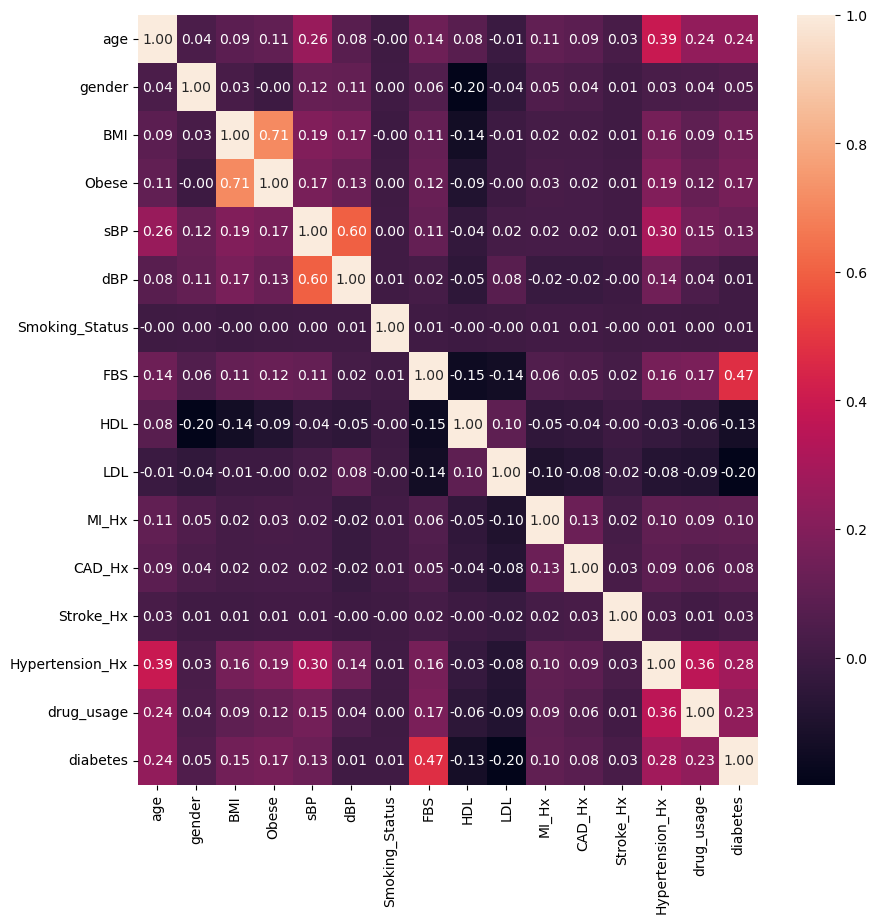

In [119]:
# We want to check the correlation between 2 different features especially with the response variable diabetes.
correlation = df_cleaned.corr()
seaborn.heatmap (correlation, annot = True, fmt=".2f")
plt.gcf().set_size_inches(10, 10)

The problem is that the dataset is highly inbalanced, we get only 74593 patients have diabetes, but the total number of the patients in the cleaned dataset is 976147, which is much larger compared with 74593.
Here, three different techiques are implemented to resolve this issue. 

1. Penalize Algorithms: During training, we can use the argument class_weight=’balanced’ to penalize mistakes on the minority class.
2. Use undersampling technique: NearMiss, TomekLinks
3. Use oversampling technique: SMOTE

Ensuring a high level of prediction accuracy is crucial, and we have employed three distinct approaches to address the data imbalance in order to achieve an optimal model.

In second Phrase, we primarily focused on the first method.

#### Logistic Regression

In [229]:
# 1. Penalize Algorithms
X = df_cleaned.drop('diabetes', axis = 1)
y = df_cleaned['diabetes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training logistic regression model
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', class_weight='balanced')
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', solver='liblinear')

In [230]:
# Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[156557  23699]
 [  3691  11283]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92    180256
           1       0.32      0.75      0.45     14974

    accuracy                           0.86    195230
   macro avg       0.65      0.81      0.69    195230
weighted avg       0.93      0.86      0.88    195230



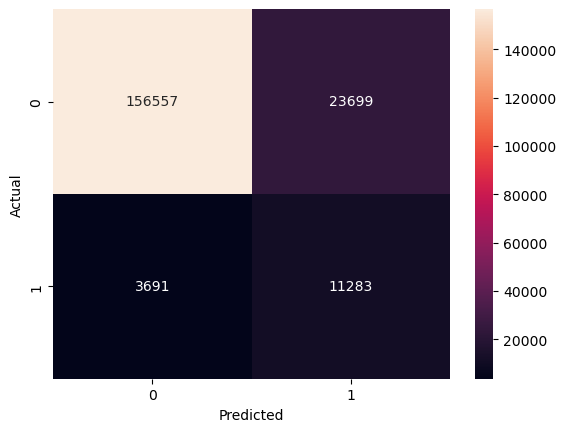

In [231]:
# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [232]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1','l2']}
log_reg = LogisticRegression(solver='liblinear', class_weight='balanced')
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_) 

{'C': 10, 'penalty': 'l1'}


In [233]:
# Use the optimal model to make predictions on the testing data
y_pred = grid_search.predict(X_test) 

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[156559  23697]
 [  3691  11283]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92    180256
           1       0.32      0.75      0.45     14974

    accuracy                           0.86    195230
   macro avg       0.65      0.81      0.69    195230
weighted avg       0.93      0.86      0.88    195230



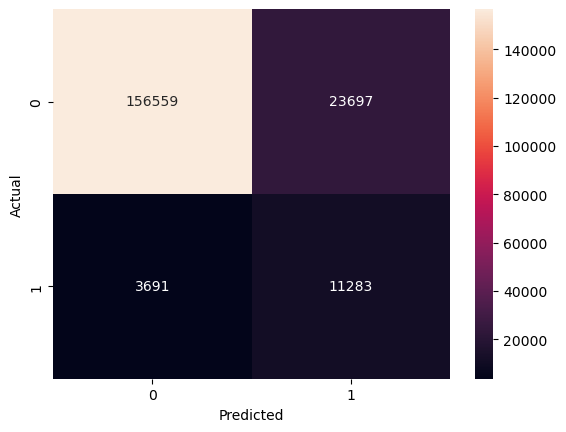

In [234]:
# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### Bernoulli Naive Bayes

In [136]:
# Create a BernoulliNB classifier
clf = BernoulliNB(alpha=1.0, binarize=0.5, fit_prior=True, class_prior=None)
# Fit the classifier on training data
clf.fit(X_train, y_train)
# Predict on test data
y_pred = clf.predict(X_test)

In [137]:
# Use the model to make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[168424  11832]
 [  7456   7518]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95    180256
           1       0.39      0.50      0.44     14974

    accuracy                           0.90    195230
   macro avg       0.67      0.72      0.69    195230
weighted avg       0.91      0.90      0.91    195230



In [138]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'binarize': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
clf = BernoulliNB(fit_prior=True, class_prior=None)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_) 

{'alpha': 0.001, 'binarize': 0.9}


In [140]:
# Use the optimal model to make predictions on the testing data
y_pred = grid_search.predict(X_test) 

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[170200  10056]
 [  7383   7591]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95    180256
           1       0.43      0.51      0.47     14974

    accuracy                           0.91    195230
   macro avg       0.69      0.73      0.71    195230
weighted avg       0.92      0.91      0.91    195230



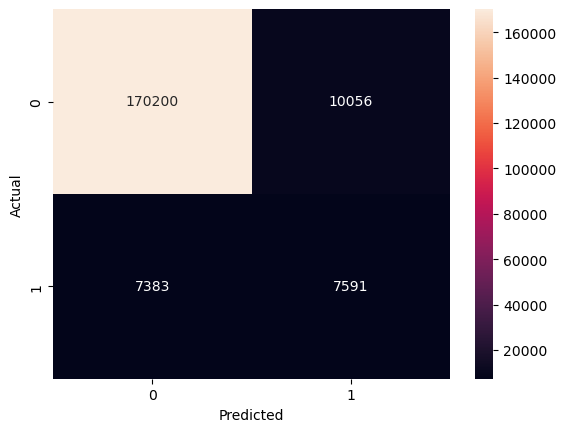

In [141]:
# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

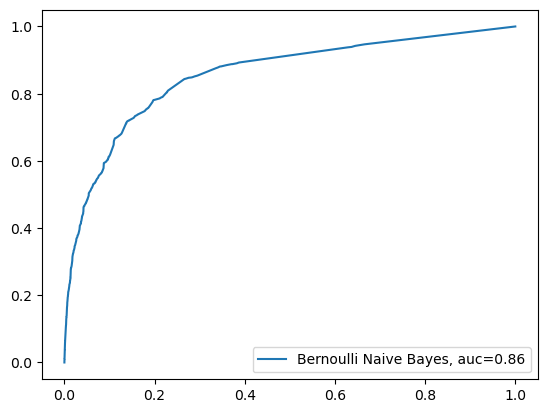

In [145]:
y_pred_proba = grid_search.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Naive Bayes')
plt.plot(fpr,tpr,label="Bernoulli Naive Bayes, auc="+str(round(auc,2)))
plt.legend(loc=4)
plt.show()

We knew that each features have a completely different covariance, so we also showed a great interest in constructing a QDA model.

#### QDA

In [202]:
# Training the QDA model on numerical columns of the training data
m = QuadraticDiscriminantAnalysis()
# Fit the classifier on training data
m.fit(X_train, y_train)
# Predict on test data
y_pred = m.predict(X_test)

In [203]:
# Use the model to make predictions on the testing data
y_pred = m.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[168380  11876]
 [  6684   8290]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95    180256
           1       0.41      0.55      0.47     14974

    accuracy                           0.90    195230
   macro avg       0.69      0.74      0.71    195230
weighted avg       0.92      0.90      0.91    195230



In [210]:
param_grid = {'reg_param': (0.00001, 0.0001, 0.001,0.01, 0.1), 
    'store_covariance': (True, False),
    'tol': (0.0001, 0.001,0.01, 0.1)}
m = QuadraticDiscriminantAnalysis()
grid_search = GridSearchCV(m, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_) 

{'reg_param': 0.1, 'store_covariance': True, 'tol': 0.0001}


In [211]:
# Use the optimal model to make predictions on the testing data
y_pred = grid_search.predict(X_test) 

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[169996  10260]
 [  7034   7940]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95    180256
           1       0.44      0.53      0.48     14974

    accuracy                           0.91    195230
   macro avg       0.70      0.74      0.72    195230
weighted avg       0.92      0.91      0.92    195230



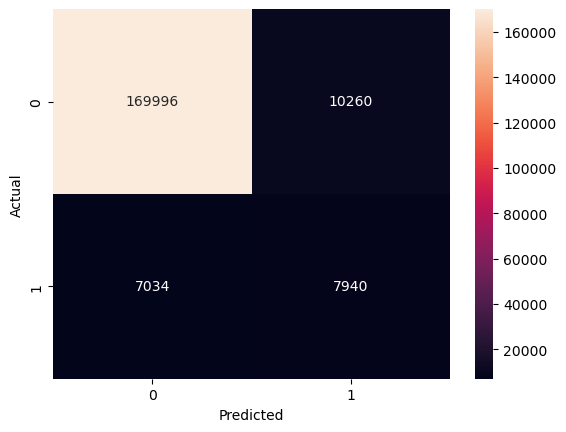

In [212]:
# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [213]:
print('The result for QDA is:')
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

The result for QDA is:
Accuracy: 0.911417
Precision: 0.436264
Recall: 0.530252
F1 score: 0.478688


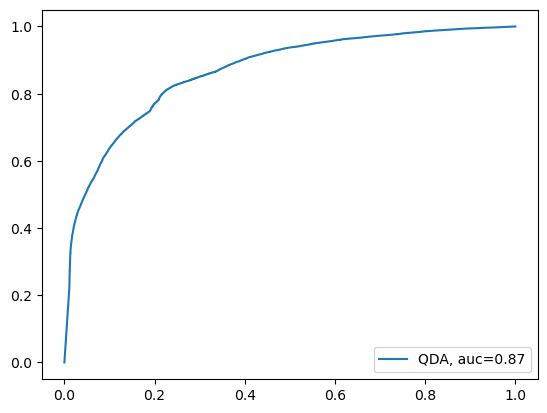

In [152]:
y_pred_proba = grid_search.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='QDA')
plt.plot(fpr,tpr,label="QDA, auc="+str(round(auc,2)))
plt.legend(loc=4)
plt.show()

#### Decision Tree

In [157]:
# Initializing a Decision Tree classifier
dt = tree.DecisionTreeClassifier(criterion='entropy',class_weight='balanced')
# Fit the classifier on training data
dt.fit(X_train, y_train)
# Predict on test data
y_pred = dt.predict(X_test)

In [159]:
# Use the model to make predictions on the testing data
y_pred = dt.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[169820  10436]
 [  7498   7476]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95    180256
           1       0.42      0.50      0.45     14974

    accuracy                           0.91    195230
   macro avg       0.69      0.72      0.70    195230
weighted avg       0.92      0.91      0.91    195230



In [164]:
param_grid = {"max_depth" : [5, 10, 15, 20 ,25, 30, 35],
    "min_samples_leaf" : [5, 10, 15, 20 ,25],
    "splitter" : ['best', 'random'],
    "max_features" : ['sqrt', 'log2']}
# Setting up Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5)
dt = tree.DecisionTreeClassifier(criterion='entropy',class_weight='balanced')
grid_search = GridSearchCV(dt, param_grid, cv=skf, scoring='f1')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_) 

{'max_depth': 25, 'max_features': 'log2', 'min_samples_leaf': 5, 'splitter': 'best'}


In [165]:
# Use the optimal model to make predictions on the testing data
y_pred = grid_search.predict(X_test) 

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[155765  24491]
 [  4314  10660]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.92    180256
           1       0.30      0.71      0.43     14974

    accuracy                           0.85    195230
   macro avg       0.64      0.79      0.67    195230
weighted avg       0.92      0.85      0.88    195230



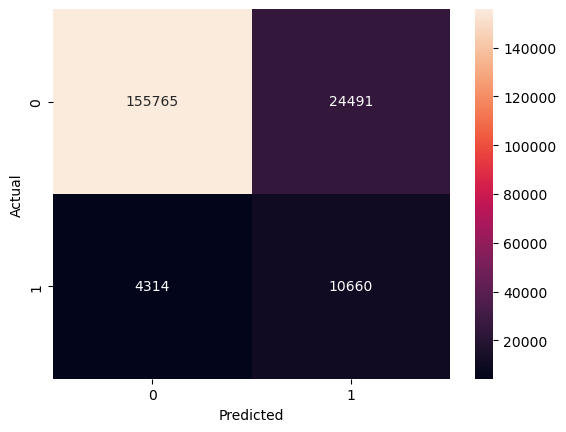

In [166]:
# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

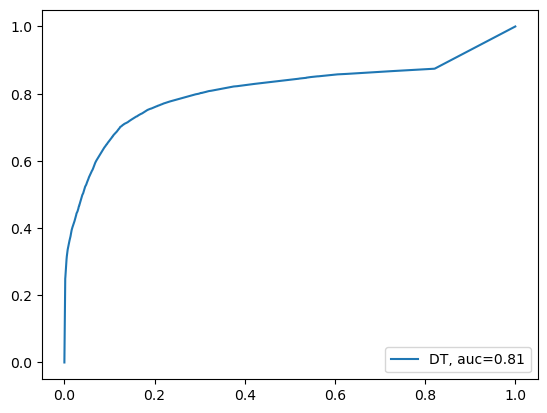

In [167]:
y_pred_proba = grid_search.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='decision tree')
plt.plot(fpr,tpr,label="DT, auc="+str(round(auc,2)))
plt.legend(loc=4)
plt.show()

#### Random Forest

In [174]:
# Initialize a Random Forest classifier 
# The criterion 'entropy' measures the quality of a split by how mixed the classes are in two groups
# class_weight 'balanced_subsample' is used to handle imbalanced classes. It computes weights based on the bootstrap sample for every tree grown.
# oob_score is set to True to use out-of-bag samples to estimate the generalization accuracy
rf = RandomForestClassifier(criterion='entropy', class_weight='balanced_subsample', oob_score=True)
# Fit the classifier on training data
rf.fit(X_train, y_train)
# Predict on test data
y_pred = rf.predict(X_test)

In [169]:
# Use the model to make predictions on the testing data
y_pred = rf.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[175096   5160]
 [  8162   6812]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96    180256
           1       0.57      0.45      0.51     14974

    accuracy                           0.93    195230
   macro avg       0.76      0.71      0.73    195230
weighted avg       0.93      0.93      0.93    195230



In [175]:
param_grid = {
    "max_depth" : [10, 15],
    "min_samples_leaf" : [15, 20]}
# Setting up Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=3)
rf = RandomForestClassifier(criterion='entropy', class_weight='balanced_subsample', oob_score=True)
grid_search = GridSearchCV(rf, param_grid, cv=skf, scoring='f1')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_) 

{'max_depth': 15, 'min_samples_leaf': 15}


In [176]:
# Use the optimal model to make predictions on the testing data
y_pred = grid_search.predict(X_test) 

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[158570  21686]
 [  3578  11396]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93    180256
           1       0.34      0.76      0.47     14974

    accuracy                           0.87    195230
   macro avg       0.66      0.82      0.70    195230
weighted avg       0.93      0.87      0.89    195230



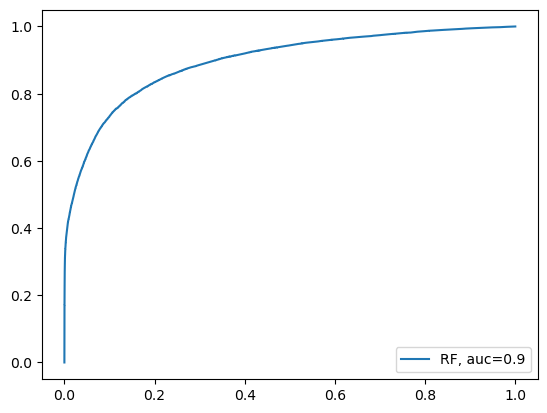

In [178]:
y_pred_proba = grid_search.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='random forest')
plt.plot(fpr,tpr,label="RF, auc="+str(round(auc,2)))
plt.legend(loc=4)
plt.show()

Since, we are still in an early phrase. Here, we only implemented QDA for uppersampling and downsampling model.

#### Uppersampling - SMOTE 

In [214]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [215]:
print('Original dataset shape is', y_train.shape)
print('Resample dataset shape', y_resampled.shape)

Original dataset shape is (780917,)
Resample dataset shape (1442596,)


In [216]:
param_grid = {'reg_param': (0.00001, 0.0001, 0.001,0.01, 0.1), 
    'store_covariance': (True, False),
    'tol': (0.0001, 0.001,0.01, 0.1)}
m = QuadraticDiscriminantAnalysis()
grid_search = GridSearchCV(m, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)
print(grid_search.best_params_) 

{'reg_param': 0.01, 'store_covariance': True, 'tol': 0.0001}


In [217]:
# Use the optimal model to make predictions on the testing data
y_pred = grid_search.predict(X_test) 

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[162653  17603]
 [  5519   9455]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.93    180256
           1       0.35      0.63      0.45     14974

    accuracy                           0.88    195230
   macro avg       0.66      0.77      0.69    195230
weighted avg       0.92      0.88      0.90    195230



In [218]:
print('After uppersampling, the result for QDA is:')
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

After uppersampling, the result for QDA is:
Accuracy: 0.881565
Precision: 0.349435
Recall: 0.631428
F1 score: 0.449895


#### Downsampling - NearMiss

In [219]:
nm = NearMiss()
X_resampled, y_resampled = nm.fit_resample(X_train, y_train)

print('Original dataset shape is', y_train.shape)
print('Resample dataset shape', y_resampled.shape)

Original dataset shape is (780917,)
Resample dataset shape (119238,)


In [220]:
param_grid = {'reg_param': (0.00001, 0.0001, 0.001,0.01, 0.1), 
    'store_covariance': (True, False),
    'tol': (0.0001, 0.001,0.01, 0.1)}
m = QuadraticDiscriminantAnalysis()
grid_search = GridSearchCV(m, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)
print(grid_search.best_params_) 

{'reg_param': 1e-05, 'store_covariance': True, 'tol': 0.0001}


In [221]:
# Use the optimal model to make predictions on the testing data
y_pred = grid_search.predict(X_test) 

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[85168 95088]
 [ 2101 12873]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.47      0.64    180256
           1       0.12      0.86      0.21     14974

    accuracy                           0.50    195230
   macro avg       0.55      0.67      0.42    195230
weighted avg       0.91      0.50      0.60    195230



In [222]:
print('After downsampling, the result for QDA is:')
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

After downsampling, the result for QDA is:
Accuracy: 0.502182
Precision: 0.119238
Recall: 0.859690
F1 score: 0.209428


#### Downsampling - TomekLinks

In [225]:
tl = TomekLinks()
X_resampled, y_resampled = tl.fit_resample(X_train, y_train)
print('Original dataset shape is', y_train.shape)
print('Resample dataset shape', y_resampled.shape)

Original dataset shape is (780917,)
Resample dataset shape (770074,)


In [226]:
param_grid = {'reg_param': (0.00001, 0.0001, 0.001,0.01, 0.1), 
    'store_covariance': (True, False),
    'tol': (0.0001, 0.001,0.01, 0.1)}
m = QuadraticDiscriminantAnalysis()
grid_search = GridSearchCV(m, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)
print(grid_search.best_params_) 

{'reg_param': 0.1, 'store_covariance': True, 'tol': 0.0001}


In [227]:
# Use the optimal model to make predictions on the testing data
y_pred = grid_search.predict(X_test) 

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[169303  10953]
 [  6896   8078]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95    180256
           1       0.42      0.54      0.48     14974

    accuracy                           0.91    195230
   macro avg       0.69      0.74      0.71    195230
weighted avg       0.92      0.91      0.91    195230



In [228]:
print('After downsampling, the result for QDA is:')
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

After downsampling, the result for QDA is:
Accuracy: 0.908575
Precision: 0.424465
Recall: 0.539468
F1 score: 0.475107


The running time for TomekLinks is quite bad and result is also not good enough to deal with the imbalance issue for this dataset. And we will have further discussion for this resampling part in our report.